# Persiapan Lingkungan dan Pemuatan Citra

In [1]:
# Import library yang dibutuhkan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [2]:
# --- Fungsi Bantu untuk Menampilkan Citra ---
def display_images(images, titles, cmap='gray', figsize=(15, 5)):
    """Menampilkan beberapa citra berdampingan."""
    plt.figure(figsize=figsize)
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        # Gunakan cmap='gray' hanya jika gambar grayscale (2 dimensi)
        plt.imshow(img, cmap=cmap if len(img.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Memulai persiapan lingkungan dan pemuatan citra...")

Memulai persiapan lingkungan dan pemuatan citra...


In [3]:
# --- Pemuatan Citra ---
# Pastikan file gambar ini sudah Anda unggah ke dataset Kaggle Anda.
# Sesuaikan path ini dengan lokasi file Anda di Kaggle.
filename = '/kaggle/input/hasil-rekaman-cctv/IP CCTV Camera (Day Vision )-Revlight Security.jpg'

try:
    img = cv2.imread(filename)
    if img is None:
        raise FileNotFoundError(f"Tidak dapat membaca gambar dari {filename}. Pastikan path dan file sudah benar.")

    # Konversi dari BGR (OpenCV default) ke RGB (Matplotlib default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    print("Gambar asli berhasil dimuat.")
except Exception as e:
    print(f"ERROR: Terjadi kesalahan saat memuat gambar: {e}")
    # Fallback: Buat gambar dummy jika gagal memuat
    img_rgb = np.zeros((200, 300, 3), dtype=np.uint8) + 128
    print("Menggunakan gambar dummy.")

Gambar asli berhasil dimuat.


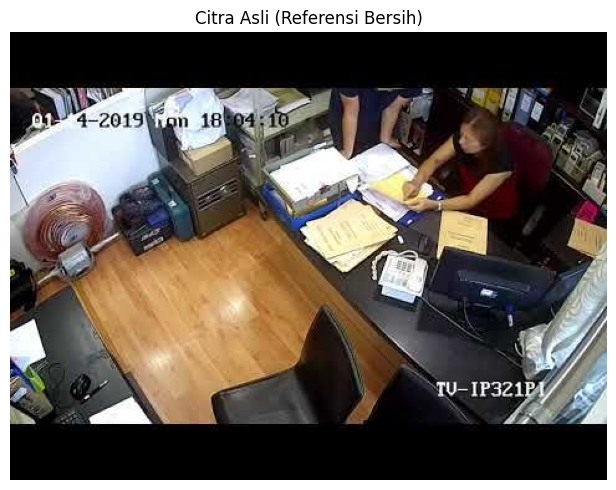

Noise Gaussian berhasil ditambahkan.


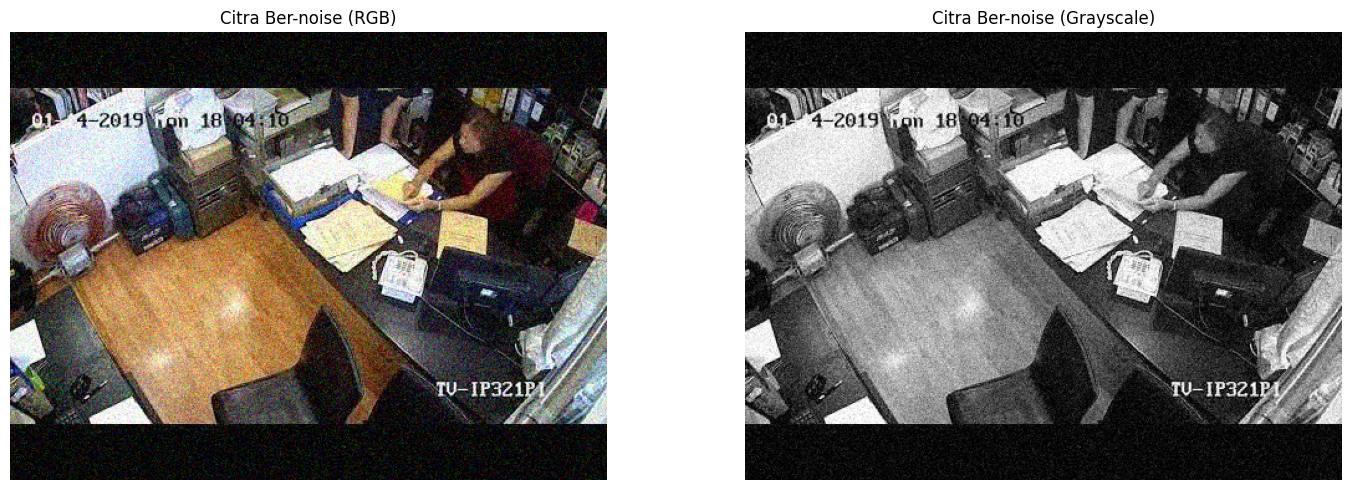

Persiapan data selesai.


In [4]:
# Tampilkan citra asli (bersih)
display_images([img_rgb], ["Citra Asli (Referensi Bersih)"], cmap=None)

# --- Simulasi Noise ---
# Kita akan menambahkan noise Gaussian pada citra untuk simulasi kasus nyata CCTV
# Konversi ke float [0, 1] sebelum menambahkan noise
img_float = img_rgb / 255.0

# Tambahkan noise Gaussian
img_gaussian_noise = random_noise(img_float, mode='gaussian', var=0.01) # var=0.01 adalah tingkat noise
# Kembalikan ke uint8 [0, 255]
img_noisy = np.clip(img_gaussian_noise * 255, 0, 255).astype(np.uint8)

# Konversi citra ber-noise ke grayscale untuk proses filtering
# Banyak filter noise reduction bekerja lebih optimal pada citra grayscale
img_gray_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_RGB2GRAY)
img_gray_original = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) # Grayscale dari citra asli bersih

print("Noise Gaussian berhasil ditambahkan.")
display_images([img_noisy, img_gray_noisy],
               ["Citra Ber-noise (RGB)", "Citra Ber-noise (Grayscale)"],
               cmap='gray') # Gunakan cmap=None untuk RGB, cmap='gray' untuk Grayscale
print("Persiapan data selesai.")

# Penerapan Filter Smoothing dan Noise Reduction


--- Menerapkan Filter Smoothing ---
Filter Rata-rata diterapkan (kernel: (5, 5)).


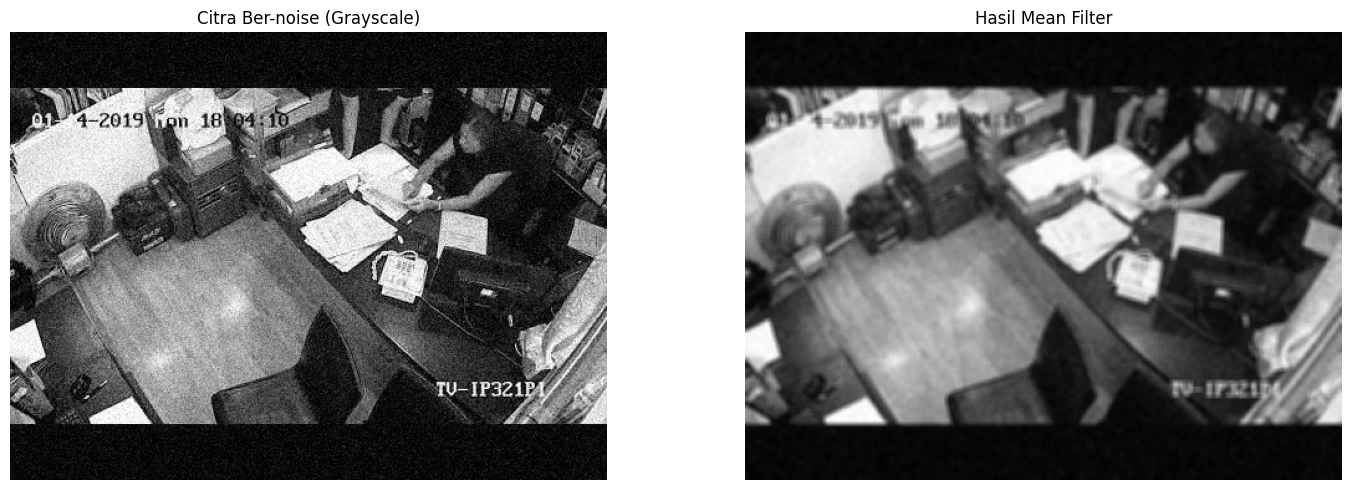

Filter Median diterapkan (kernel: 5).


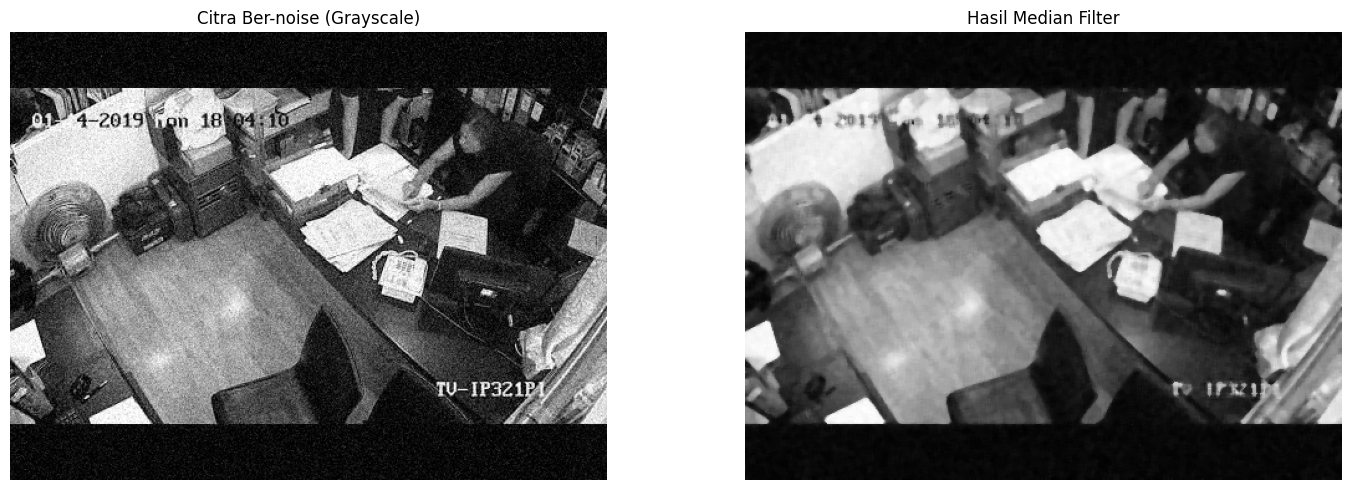

Gaussian Blur diterapkan (kernel: (5, 5), sigma: 0).


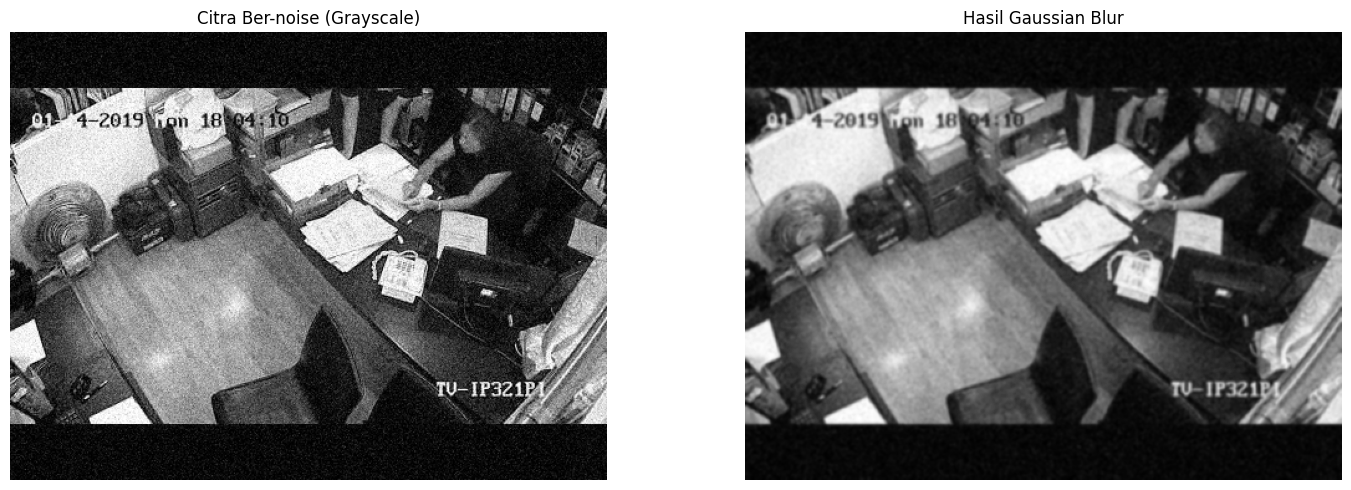

Bilateral Filter diterapkan (d=9, sigmaColor=75, sigmaSpace=75).


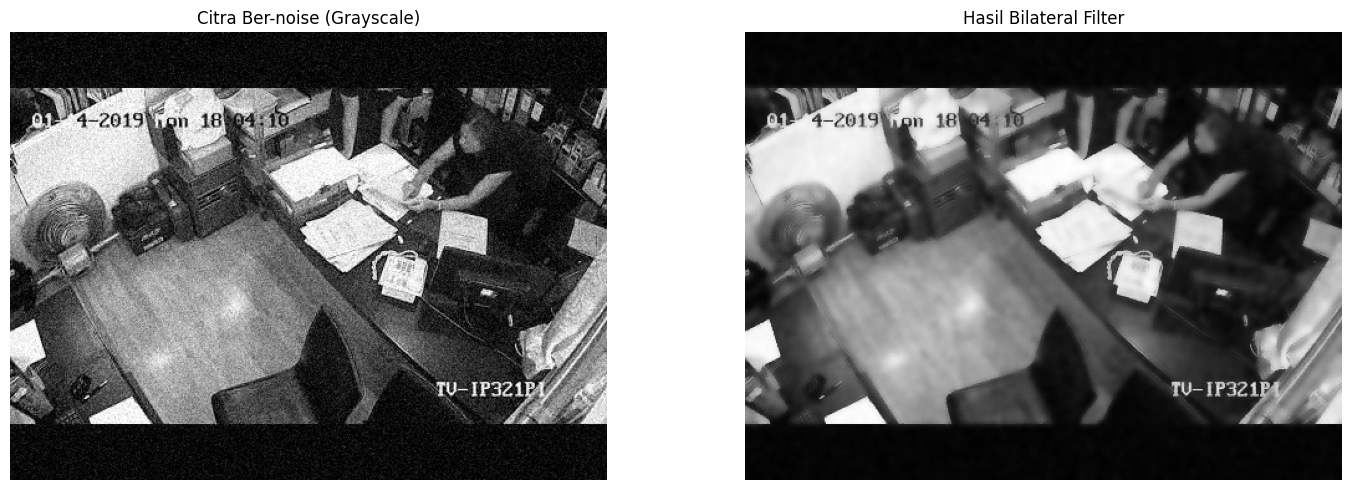


Semua filter telah diterapkan. Menampilkan perbandingan keseluruhan...


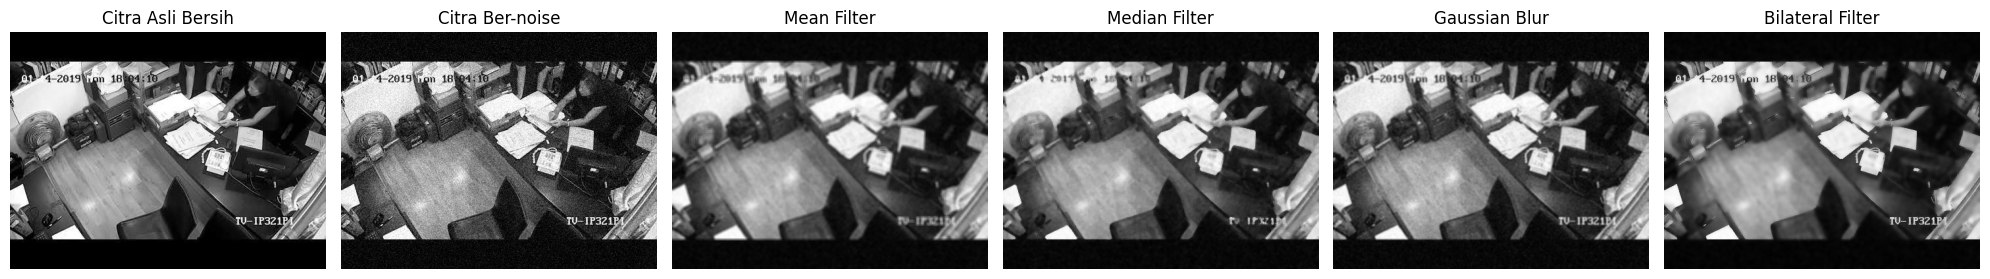

Perbandingan visual selesai.


In [5]:
print("\n--- Menerapkan Filter Smoothing ---")

# --- 2.1. Filter Rata-rata (Mean Filter) ---
# cv2.blur(src, ksize)
# ksize: Ukuran kernel (jendela) filter. Coba ukuran (5,5) atau (3,3).
kernel_size_mean = (5, 5)
mean_filtered_img = cv2.blur(img_gray_noisy, kernel_size_mean)
print(f"Filter Rata-rata diterapkan (kernel: {kernel_size_mean}).")
display_images([img_gray_noisy, mean_filtered_img],
               ["Citra Ber-noise (Grayscale)", "Hasil Mean Filter"],
               cmap='gray')

# --- 2.2. Filter Median (Median Filter) ---
# cv2.medianBlur(src, ksize)
# ksize: Ukuran kernel, harus bilangan ganjil (e.g., 3, 5, 7).
kernel_size_median = 5
median_filtered_img = cv2.medianBlur(img_gray_noisy, kernel_size_median)
print(f"Filter Median diterapkan (kernel: {kernel_size_median}).")
display_images([img_gray_noisy, median_filtered_img],
               ["Citra Ber-noise (Grayscale)", "Hasil Median Filter"],
               cmap='gray')

# --- 2.3. Gaussian Blur ---
# cv2.GaussianBlur(src, ksize, sigmaX)
# ksize: Ukuran kernel (harus ganjil). sigmaX: Standar deviasi di sumbu X (0=dihitung otomatis).
kernel_size_gaussian = (5, 5)
sigma_gaussian = 0 # Otomatis
gaussian_filtered_img = cv2.GaussianBlur(img_gray_noisy, kernel_size_gaussian, sigma_gaussian)
print(f"Gaussian Blur diterapkan (kernel: {kernel_size_gaussian}, sigma: {sigma_gaussian}).")
display_images([img_gray_noisy, gaussian_filtered_img],
               ["Citra Ber-noise (Grayscale)", "Hasil Gaussian Blur"],
               cmap='gray')

# --- 2.4. Bilateral Filter (Filter Lanjutan) ---
# cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)
# d: Diameter neighborhood piksel.
# sigmaColor: Range piksel di ruang warna (semakin besar, piksel warna jauh ikut diblur).
# sigmaSpace: Range piksel di ruang koordinat (semakin besar, piksel spasial jauh ikut diblur).
d_bilateral = 9
sigma_color = 75
sigma_space = 75
bilateral_filtered_img = cv2.bilateralFilter(img_gray_noisy, d_bilateral, sigma_color, sigma_space)
print(f"Bilateral Filter diterapkan (d={d_bilateral}, sigmaColor={sigma_color}, sigmaSpace={sigma_space}).")
display_images([img_gray_noisy, bilateral_filtered_img],
               ["Citra Ber-noise (Grayscale)", "Hasil Bilateral Filter"],
               cmap='gray')

print("\nSemua filter telah diterapkan. Menampilkan perbandingan keseluruhan...")

# --- Perbandingan Visual Keseluruhan ---
display_images(
    [img_gray_original, img_gray_noisy, mean_filtered_img, median_filtered_img, gaussian_filtered_img, bilateral_filtered_img],
    ["Citra Asli Bersih", "Citra Ber-noise", "Mean Filter", "Median Filter", "Gaussian Blur", "Bilateral Filter"],
    cmap='gray',
    figsize=(20, 6) # Sesuaikan ukuran jika terlalu sempit
)
print("Perbandingan visual selesai.")

# Evaluasi Kuantitatif (PSNR dan SSIM)

In [6]:
print("\n--- Evaluasi Kuantitatif (PSNR, SSIM) ---")

# Menghitung metrik untuk setiap citra hasil filter dibandingkan dengan citra asli yang bersih

# Baseline: Citra Ber-noise dibandingkan dengan Asli Bersih
psnr_noisy = psnr(img_gray_original, img_gray_noisy, data_range=255)
ssim_noisy = ssim(img_gray_original, img_gray_noisy, data_range=255)

# Mean Filter
psnr_mean = psnr(img_gray_original, mean_filtered_img, data_range=255)
ssim_mean = ssim(img_gray_original, mean_filtered_img, data_range=255)

# Median Filter
psnr_median = psnr(img_gray_original, median_filtered_img, data_range=255)
ssim_median = ssim(img_gray_original, median_filtered_img, data_range=255)

# Gaussian Blur
psnr_gaussian = psnr(img_gray_original, gaussian_filtered_img, data_range=255)
ssim_gaussian = ssim(img_gray_original, gaussian_filtered_img, data_range=255)

# Bilateral Filter
psnr_bilateral = psnr(img_gray_original, bilateral_filtered_img, data_range=255)
ssim_bilateral = ssim(img_gray_original, bilateral_filtered_img, data_range=255)

# Menampilkan Hasil Metrik
print(f"Citra Ber-noise   : PSNR = {psnr_noisy:.2f} dB, SSIM = {ssim_noisy:.4f}")
print(f"Mean Filter       : PSNR = {psnr_mean:.2f} dB, SSIM = {ssim_mean:.4f}")
print(f"Median Filter     : PSNR = {psnr_median:.2f} dB, SSIM = {ssim_median:.4f}")
print(f"Gaussian Blur     : PSNR = {psnr_gaussian:.2f} dB, SSIM = {ssim_gaussian:.4f}")
print(f"Bilateral Filter  : PSNR = {psnr_bilateral:.2f} dB, SSIM = {ssim_bilateral:.4f}")

print("\nEvaluasi kuantitatif selesai.")


--- Evaluasi Kuantitatif (PSNR, SSIM) ---
Citra Ber-noise   : PSNR = 24.34 dB, SSIM = 0.4855
Mean Filter       : PSNR = 21.76 dB, SSIM = 0.5343
Median Filter     : PSNR = 22.90 dB, SSIM = 0.5703
Gaussian Blur     : PSNR = 23.85 dB, SSIM = 0.6047
Bilateral Filter  : PSNR = 25.09 dB, SSIM = 0.5984

Evaluasi kuantitatif selesai.
